In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv

In [2]:
df = pd.read_csv('laptops.csv')

In [3]:
df.shape

(2160, 12)

In [4]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

### EDA

* Look at the `final_price` variable. Does it have a long tail? 

In [5]:
df = df.loc[:, ['ram', 'storage', 'screen', 'final_price']]

In [6]:
df.head()

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01


<Axes: >

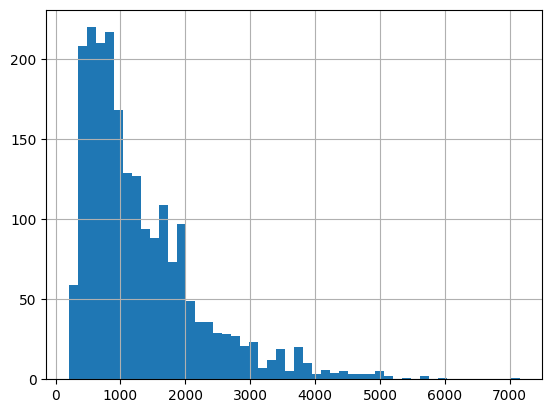

In [7]:
df.final_price.hist(bins=50)

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* **`'screen'`**
* `'final_price'`


In [8]:
df.isnull().any().eq(True).sum()

np.int64(1)

In [9]:
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- **16**
- 24
- 32

In [10]:
df.ram.median()

np.float64(16.0)

In [11]:
df.ram.describe()

count    2160.000000
mean       15.413889
std         9.867815
min         4.000000
25%         8.000000
50%        16.000000
75%        16.000000
max       128.000000
Name: ram, dtype: float64

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures

In [12]:
idx = np.arange(df.shape[0])
np.random.seed(42)
np.random.shuffle(idx)

In [13]:
n_val = int(df.shape[0] * 0.2)
n_test = int(df.shape[0] * 0.2)
n_train = df.shape[0] - n_val - n_test

In [14]:
n_train, n_val, n_test

(1296, 432, 432)

In [15]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train: n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [16]:
df_train.head(5)

,ram,storage,screen,final_price
2079,32,1000,15.6,1123.29
668,4,64,14.1,201.05
2073,32,1000,14.0,997.74
1113,16,512,13.3,1016.00
788,32,1000,16.0,2739.00


In [17]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

In [19]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [20]:
df_train.isnull().sum()

ram        0
storage    0
screen     3
dtype: int64

### Data with 0 in null values for the screen column

In [21]:
X_train_zero = df_train.fillna(0)
X_val_zero = df_val.fillna(0)
X_test_zero = df_test.fillna(0)

### Data with mean in null values for the screen column

In [22]:
screen_mean = df_train.screen.mean()

In [23]:
X_train_mean = df_train.fillna(screen_mean)
X_val_mean = df_val.fillna(screen_mean)
X_test_mean = df_test.fillna(screen_mean)

### RMSE and Linear Regression functions

In [24]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

### Linear Regression with 0 as a fill NA value